In [1]:
from nltk.ccg import chart, lexicon

In [3]:
lex = lexicon.fromstring('''
     :- S, NP, N, VP

     Det :: NP/N
     Pro :: NP
     Modal :: S\\NP/VP

     TV :: VP/NP
     DTV :: TV/NP

     the => Det

     that => Det
     that => NP

     I => Pro
     you => Pro
     we => Pro

     chef => N
     cake => N
     children => N
     dough => N

     will => Modal
     should => Modal
     might => Modal
     must => Modal

     and => var\\.,var/.,var

     to => VP[to]/VP

     without => (VP\\VP)/VP[ing]

     be => TV
     cook => TV
     eat => TV

     cooking => VP[ing]/NP
      give => DTV
      is => (S\\NP)/NP
      prefer => (S\\NP)/NP
         which => (N\\N)/(S/NP)
    
         persuade => (VP/VP[to])/NP
        ''')

In [12]:
parser = chart.CCGChartParser(lex, chart.DefaultRuleSet)
for parse in parser.parse("that is the dough which you will eat without cooking".split()):
    chart.printCCGDerivation(parse)
    

 that      is        the    dough      which       you     will        eat          without           cooking
  NP   ((S\NP)/NP)  (NP/N)    N    ((N\N)/(S/NP))  NP   ((S\NP)/VP)  (VP/NP)  ((VP\VP)/VP['ing'])  (VP['ing']/NP)
                                                  ----->T
                                               (S/(S\NP))
                                                                             ------------------------------------->B
                                                                                         ((VP\VP)/NP)
                                                                    ----------------------------------------------<Sx
                                                                                       (VP/NP)
                                                       ----------------------------------------------------------->B
                                                                               ((S\NP)/NP)
                    

                          (N/(N\N))
---------------------------------->B
            (S/(N\N))
                                                  ----->T
                                               (S/(S\NP))
                                                                             ------------------------------------->B
                                                                                         ((VP\VP)/NP)
                                                                    ----------------------------------------------<Sx
                                                                                       (VP/NP)
                                                       ----------------------------------------------------------->B
                                                                               ((S\NP)/NP)
                                                  ---------------------------------------------------------------->B
                                

In [ ]:
chart.CCGChartParser

In [13]:
lex = lexicon.fromstring('''
   :- S, NP, N
   She => NP {she} [1.0]
   has => (S\\NP)/NP {\\x y.have(y, x)} [0.5]
   a => NP/N {\\P.exists z.P(z)} [0.6]
   book => N {book}
   ''',
   True)

In [15]:
parser = chart.CCGChartParser(lex, chart.DefaultRuleSet)
for parse in parser.parse("She has a book".split()):
    chart.printCCGDerivation(parse)
    break

   She                 has                           a                book
 NP {she}  ((S\NP)/NP) {\x y.have(y,x)}  (NP/N) {\P.exists z.P(z)}  N {book}
                                        ------------------------------------->
                                                NP {exists z.book(z)}
          ------------------------------------------------------------------->
                         (S\NP) {\y.have(y,exists z.book(z))}
-----------------------------------------------------------------------------<
                       S {have(she,exists z.book(z))}


In [24]:
parse.draw()

In [22]:
chart.printCCGDerivation(parse)

   She                 has                           a                book
 NP {she}  ((S\NP)/NP) {\x y.have(y,x)}  (NP/N) {\P.exists z.P(z)}  N {book}
                                        ------------------------------------->
                                                NP {exists z.book(z)}
          ------------------------------------------------------------------->
                         (S\NP) {\y.have(y,exists z.book(z))}
-----------------------------------------------------------------------------<
                       S {have(she,exists z.book(z))}


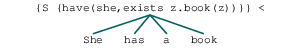

In [26]:
flat = parse.flatten()
parse.